<a href="https://colab.research.google.com/github/MLeaders/MachineLearningStage/blob/main/COM4509_lab2_(2024_25).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction
<font color='#777'>Based on a notebook by Mauricio A Álvarez</font>

In this lab we will be using using [scikit-learn](https://scikit-learn.org/stable/) (a popular machine learning library) to predict bike rentals.

The purpose of this lab is to:
 - See how one might load and explore/visualise a dataset
 - See an example of an invalid train/test split that introduces spurious correlations
 - Use an sklearn model to try and make predictions.

# 2. Load the data

In [1]:
import urllib.request
import pandas as pd

urllib.request.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv', './SeoulBikeData.csv')
bike_sharing_data = pd.read_csv('SeoulBikeData.csv', encoding= 'unicode_escape')

bike_sharing_data = bike_sharing_data.drop('Date', axis=1) #we don't use this column so we remove it

We can get a description of the data

In [2]:
bike_sharing_data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


We can see some of the rows in the dataset

In [3]:
bike_sharing_data.sample(5)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
1766,182,14,-2.4,30,3.4,1824,-17.6,2.08,0.0,0.0,Winter,No Holiday,Yes
3976,1458,16,28.8,37,2.4,1629,12.6,1.44,0.0,0.0,Spring,No Holiday,Yes
182,350,14,-1.3,27,3.1,1906,-17.9,1.12,0.0,0.0,Winter,No Holiday,Yes
1224,196,0,-0.3,60,1.9,340,-7.1,0.00,0.0,0.0,Winter,No Holiday,Yes
4554,3309,18,26.2,54,2.2,1183,16.1,0.88,0.0,0.0,Summer,No Holiday,Yes


- The target ('dependent') variable, that we're interested in (that we call $y$) corresponds to the Rented Bike Count variable.
- The feature/attribute/'independent' variables are made of the next twelve columns. So *hour* is $x_1$, *Temperature* is $x_2$...etc.

We follow some of the steps in the ML checklist we used in the lecture, including data exploration, data preprocessing, and optimising the model parameters.

- Remember: test data that we later use for assessing the generalisation performance should be set aside when we first get the data.

- Any data preprocessing that you do should mostly be done just on the training data. Separating the dataset into training and test before any preprocessing has happened, helps us to recreate the real world scenario where we will deploy our system and for which the data will come without any preprocessing. Here though we'll first convert the integer columns to floats.

In [ ]:
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
dtypes: float64(6), int64(4), object(3)
memory usage:

Several algorithms that we will use assume the inputs to be type 'float' instead of 'int', so we transform those variables in the dataset from int64 to float64.

In [ ]:
for col in ['Rented Bike Count', 'Hour', 'Humidity(%)', 'Visibility (10m)']:
    bike_sharing_data[col] = bike_sharing_data[col].astype('float64')

In [ ]:
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   float64
 1   Hour                       8760 non-null   float64
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   float64
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   float64
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
dtypes: float64(10), object(3)
memory usage: 889.8+ K

The dataset has a few thousand observations. We will use 85% of the data for training and 15% for testing. The `train_test_split` function in scikit-learn allows to easily get these partitions.

- By specifying a value for `random_state`, we are making sure that every time we run this instruction, the train and test set will have the exact same instances. `random_state` "controls the shuffling applied to the data before applying the split".

In [ ]:
from sklearn.model_selection import train_test_split
bs_train_set, bs_test_set = train_test_split(bike_sharing_data, test_size=0.15, random_state=42)

- The train and test sets are chosen randomly from all the available data.

### Question 1

1. Discuss whether this split is a good choice: Will it over-inflate our accuracy estimate?
2. Does it depend on which classifier we use?
3. What does it mean for generalisation?
4. What steps have we skipped from end-to-end ML?

---

Answer here

---

# 3. The train/test split and introducing spurious correlations

The key issue when answering the above questions is to think about spurious correlations that might inflate your accuracy.

Let's consider a simple, synthetic/toy example dataset.

We want to predict if we will make a profit from the bike hire scheme. We have a column for if a given hour is profitable (i.e. enough bikes are in use to turn a profit). We also have a column for the number of wind gusts that hour (we think that this can help predict our profits!).

We have two observations for each day (0-9):

In [ ]:
#windy  bike hires
import numpy as np

example = np.array([[0,154],[0,153], [0,132],[0,133], [1,74],[1,72], [0,53],[0,52], [0,121],[0,123], [1,11],[1,14], [1,2],[1,3],[1,142],[1,143],[0,45],[0,46],[1,89],[1,88]])
exampleday = np.array([0,0,1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9])
df = pd.DataFrame(np.c_[exampleday,example],columns=['day','profit','gusts'])
df

,day,profit,gusts
0,0,0,154
1,0,0,153
2,1,0,132
3,1,0,133
4,2,1,74
5,2,1,72
6,3,0,53
7,3,0,52
8,4,0,121
9,4,0,123


Question: Looking at the data, do you think that the number of gusts can *really* help predict the profit?

Let's find out. We split the data 70:30, randomly:

In [ ]:
train_example, test_example = train_test_split(df, test_size=0.3, random_state=2)
print("TRAIN:")
print(train_example)
print("TEST:")
print(test_example)

TRAIN:
    day  profit  gusts
3     1       0    133
10    5       1     11
1     0       0    153
17    8       0     46
7     3       0     52
16    8       0     45
14    7       1    142
2     1       0    132
11    5       1     14
6     3       0     53
19    9       1     88
13    6       1      3
15    7       1    143
8     4       0    121
TEST:
    day  profit  gusts
12    6       1      2
4     2       1     74
18    9       1     89
0     0       0    154
9     4       0    123
5     2       1     72


We train a nearest neighbour classifier on the training data, and predict on the test data:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(train_example[['gusts']],train_example['profit'])
print(neigh.predict(test_example[['gusts']])==test_example['profit'])

12    True
4     True
18    True
0     True
9     True
5     True
Name: profit, dtype: bool


Great... it classified them all correctly.

The problem is that the number of gusts between two hours on the same day is strongly correlated. But an hour might be profitable for many other reasons. So it is likely that this success is due to having correlations in the number of gusts between hours on the same day.

To mitigate this, we need to be more careful about how we split our data. As an example, we can use `GroupShuffleSplit` to do this instead which allows us to pass a `groups` parameter telling it which rows are in the same group.

Here we are splitting the data using this method, note where we pass `groups = df['day']` to say how we want the data to be grouped when splitting.

In [ ]:
from sklearn.model_selection import GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=2)
gss.get_n_splits()
train_idx, test_idx = next(gss.split(df, groups = df['day']))
train_group_example = df.iloc[train_idx]
test_group_example = df.iloc[test_idx]
print("TRAIN:")
print(train_group_example)
print("TEST:")
print(test_group_example)

TRAIN:
    day  profit  gusts
0     0       0    154
1     0       0    153
4     2       1     74
5     2       1     72
6     3       0     53
7     3       0     52
12    6       1      2
13    6       1      3
14    7       1    142
15    7       1    143
16    8       0     45
17    8       0     46
18    9       1     89
19    9       1     88
TEST:
    day  profit  gusts
2     1       0    132
3     1       0    133
8     4       0    121
9     4       0    123
10    5       1     11
11    5       1     14


Notice that different hours from the same day are in the same set.

Let's run the classifier again

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(train_group_example[['gusts']],train_group_example['profit'])
print(neigh.predict(test_group_example[['gusts']])==test_group_example['profit'])

2     False
3     False
8     False
9     False
10     True
11     True
Name: profit, dtype: bool


It's got 4 out of 6 of the predictions **wrong**! Maybe the number of wind gusts isn't useful for predicting profit afterall?

<mark>Take home message: The correlations in the data can lead to artificially inflated accuracies. Think carefully about how you split your data!</mark>


# 4. Visualising and Exploring the dataset

Back to the lab and the bike hire rate prediction problem....

Note: we are going to continue using the `train_test_split` approach - but notice that in this data we will definitely be wrongly inflating accuracy, as neighbouring hours of bike-hire activity are probably correlated in such a way that the analysis is wrong. Ideally we should use a similar approach to above to split the data correctly.

## Histograms

Let us first look at histograms for each of the continuous attributes.

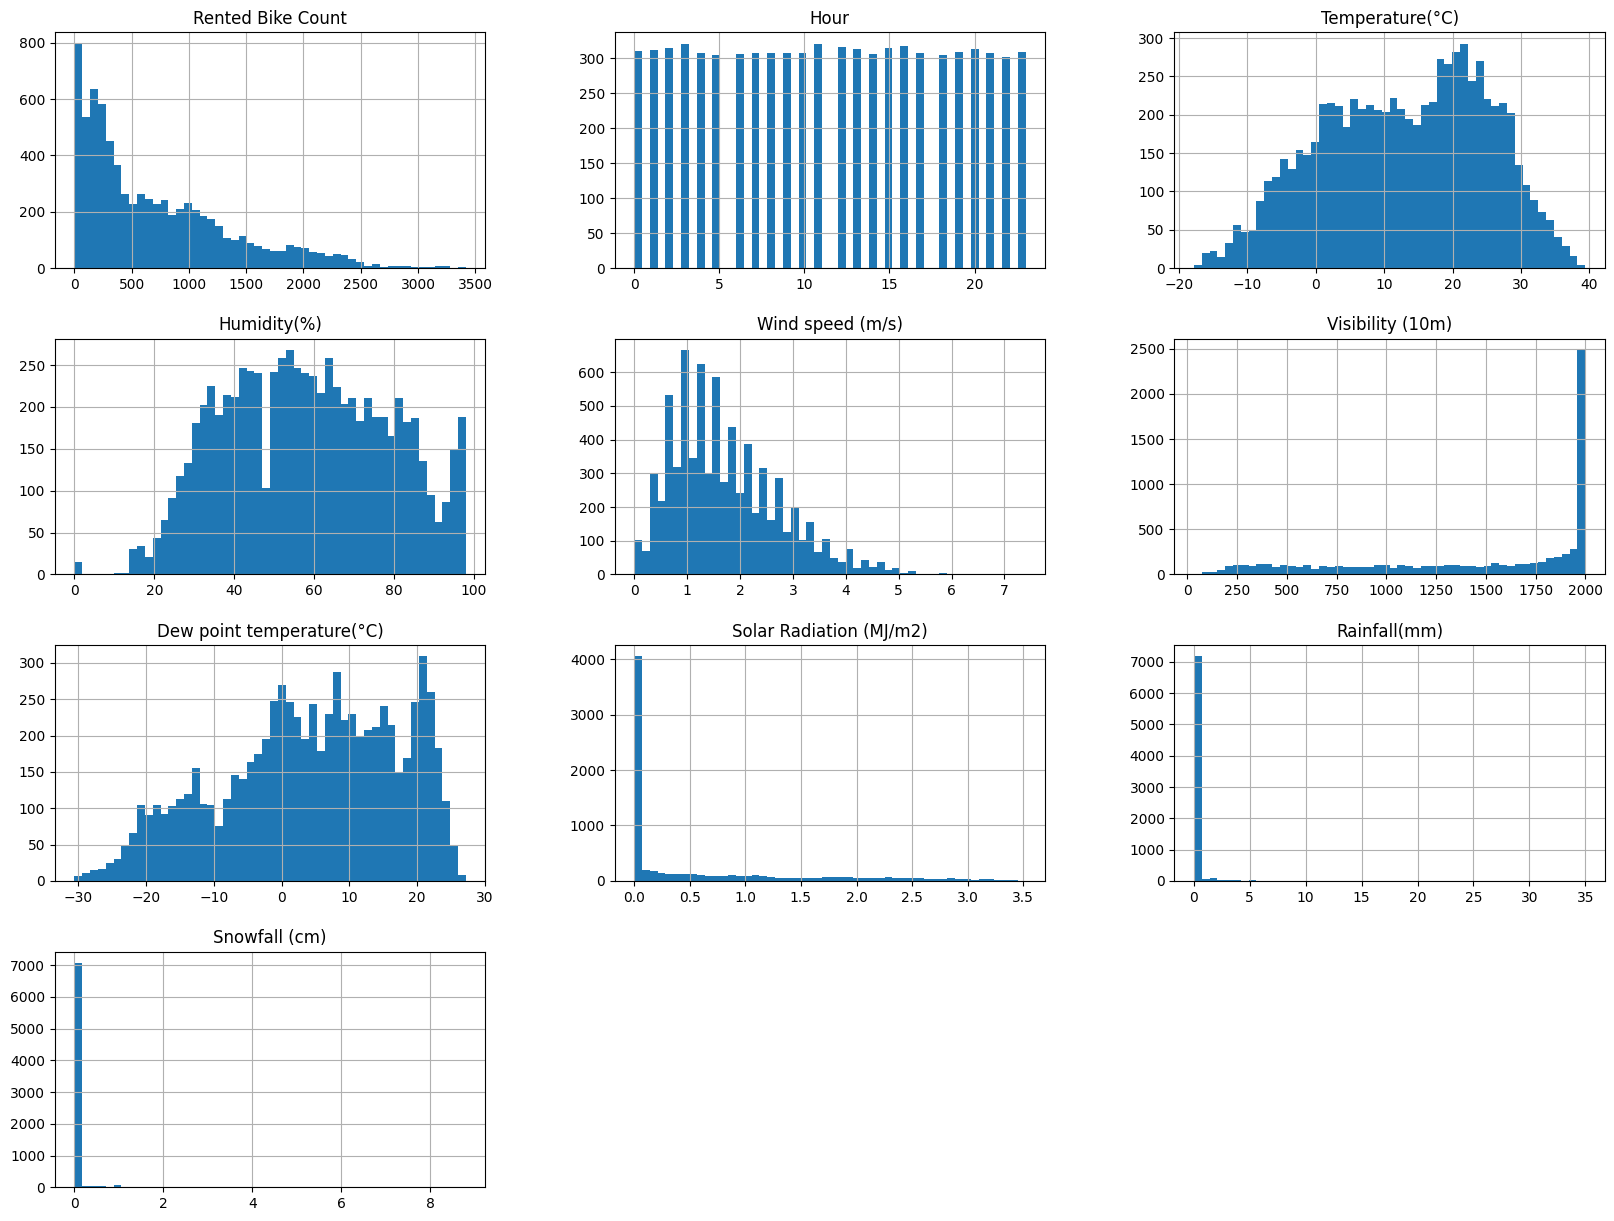

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
bs_train_set.hist(bins=50, figsize=(20,15))
plt.show()

Some observations from the histograms are:

1. The values for the variables Rainfall, Snowfall, Solar Radition and Visibility are concentrated at one of the ends of the plots. This is an indication that several instances might contain outliers. One can consider removing these outliers from the data or binning the data into a few discrete values.

2. Both the Rented Bike Count and the Wind Speed are skewed (https://en.wikipedia.org/wiki/Skewness). Some ML algorithms find it harder to detect patterns for this type of distribution. One might consider transforming these features using $\log(x)$ or $\sqrt{x}$ so that they look more like a bell-shaped distribution.

## Question 2

1. Compute the mean and the median for the variables Rented Bike Count and Wind Speed and verify that the mean is to the right of the median.
2. How would the histograms for Rented Bike Count and the Wind Speed look like if we transform the values using $\sqrt{x}$?
3. Would it be possible to use $\log{x}$ instead of $\sqrt{x}$? If not, what would you do to the variable to be able to use it?

In [ ]:
#Provide your answer here

## Scatter plots

The Scatter plot is a tool we can use to explore dependencies between the different variables. It contains plots of each variable against each other in the dataset. If there are many variables in the feature vector, including all scatter plots might not be convenient to visualise. Let us look at the scatter plot for the target variable and four of the attributes.

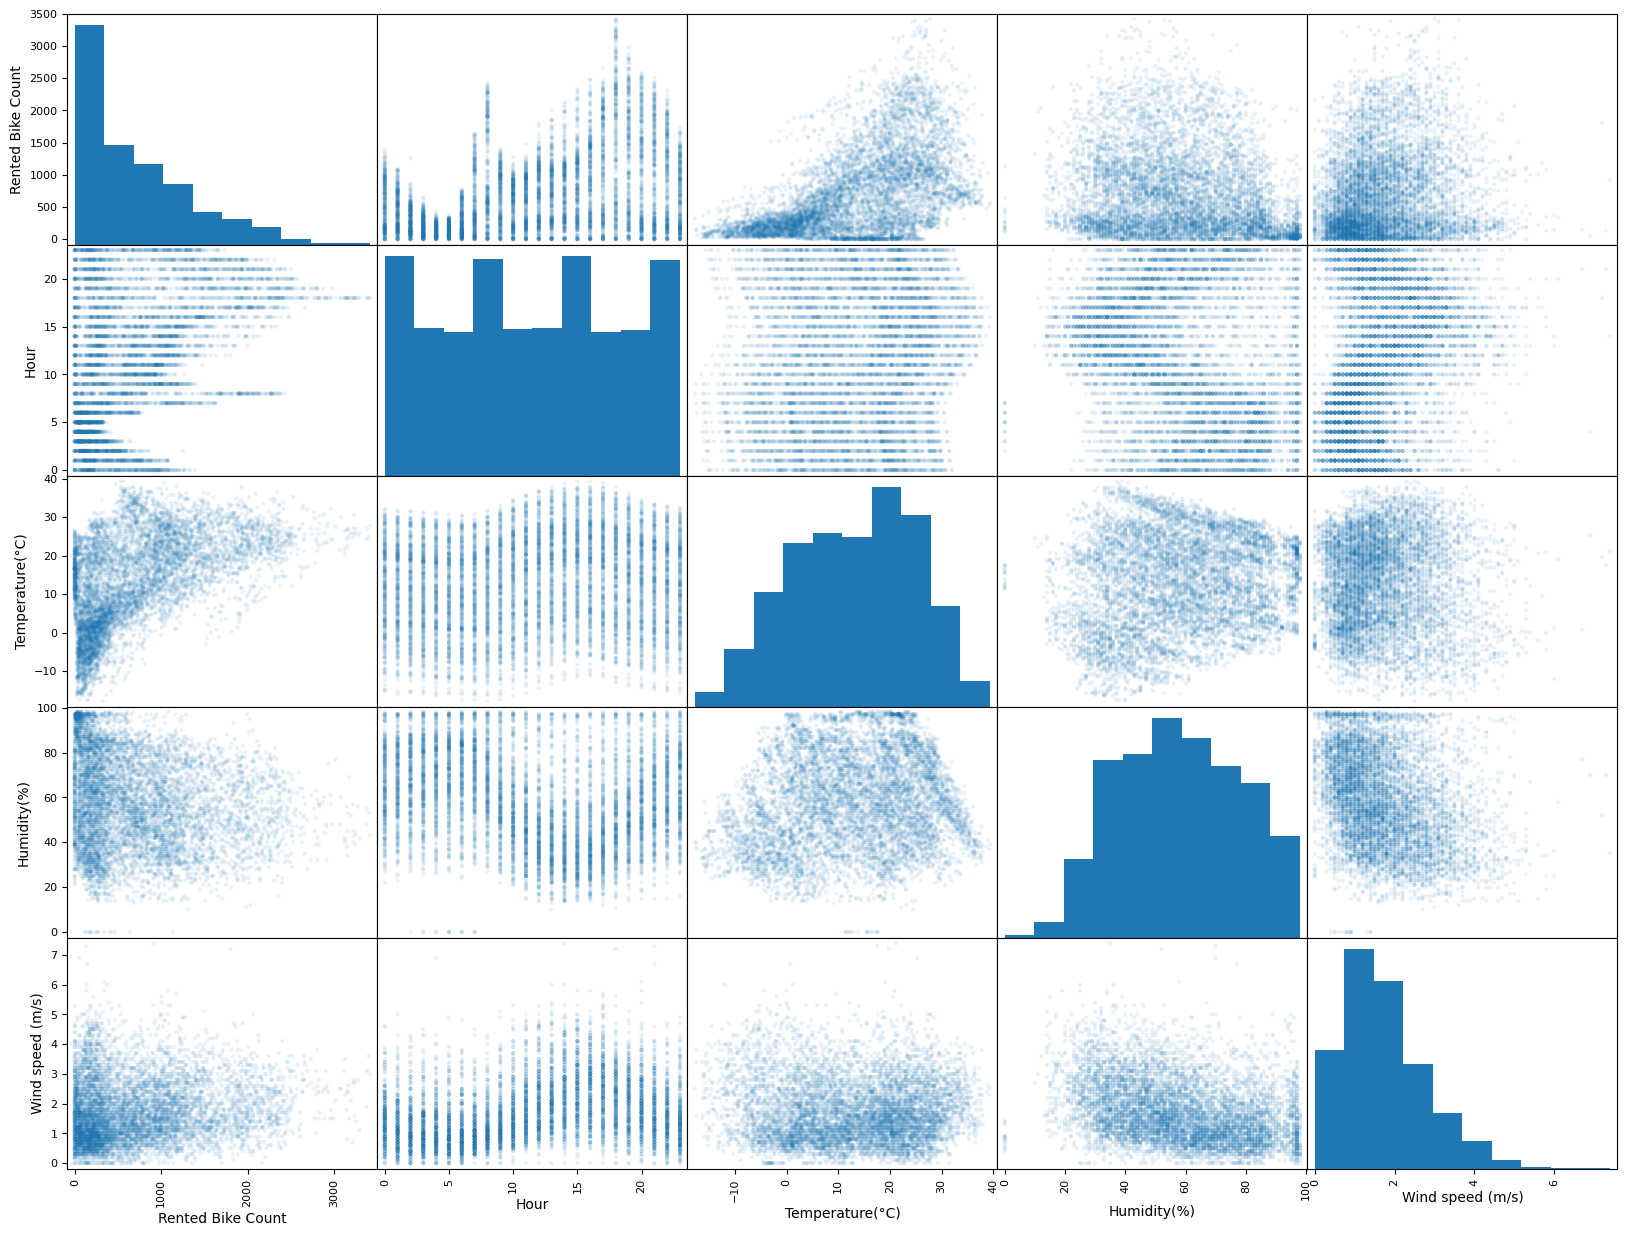

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)']
figscat = scatter_matrix(bs_train_set[attributes], figsize=(20, 15),alpha=0.1)

The variables Hour and Temperature seem correlated with Rented Bike Count. The relationship between Humidity and Wind Speed with Rented Bike Count looks less clear though.

# 5. Prepare the data

We will now prepare the data so that it is suitable for the machine learning models. We do two things in this notebook,

1. [OneHotEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?highlight=onehotencoder#sklearn.preprocessing.OneHotEncoder) allows to transform a categorical variable to a one-hot encoding representation.

2. [StandardScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler) performs feature scaling by standardisation.

`OneHotEncoder()` and `StandardScaler()` are examples of [data transformations](https://scikit-learn.org/stable/data_transforms.html). In scikit-learn these are referred to as *transformers* and they map the data from one format to another. In a programming context, transformers are classes. They come with the following methods:

- `fit` that is used to learn the  transformation from data.
- `transform` that is used to transform the data once the transformer has been fitted.   
- `fit_transform` that applies first `fit` and then `transform` to the data.

Typically, we use either `fit` or `fit_transform` for the training data and `transform` for the validation or test data.

Since the one-hot-encoding and standardisation transformations are often used, rather than code such function from scratch we make use of the [ColumnTransformer()](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html?highlight=columntransformer#sklearn.compose.ColumnTransformer), an estimator available in scikit-learn that allows to group different transformations into a single method. `ColumnTransformer` is an example of an *estimator* in scikit-learn. An estimator is an object that provides predictions for new data.

To apply the transformation we need a list of the categorical attributes and a list of the numerical attributes:

In [ ]:
attributes_cat = ['Seasons', 'Holiday', 'Functioning Day']
attributes_num = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', \
                  'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

We now import `OneHotEncoder`, `StandardScaler` and `ColumnTransformer` and create the actual transformer

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

full_transform = ColumnTransformer([
    ("num", StandardScaler(), attributes_num),
    ("cat", OneHotEncoder(), attributes_cat),
])

Before applying the full transformation, we separate the target feature from the attributes

In [ ]:
bs_train_set_attributes = bs_train_set.drop('Rented Bike Count', axis=1)
bs_train_set_labels = bs_train_set['Rented Bike Count']

bs_test_set_attributes = bs_test_set.drop('Rented Bike Count', axis=1)
bs_test_set_labels = bs_test_set['Rented Bike Count']

We can now apply the full transformation to the training/test data using `fit_transform`

In [ ]:
bs_train_set_attributes_prepared = full_transform.fit_transform(bs_train_set_attributes)
bs_test_set_attributes_prepared = full_transform.fit_transform(bs_test_set_attributes)

## 6. Optimising Model Parameters

We don't want to train yet (and test on the held-out test set), as we don't know what a good value of k might be. We should not use test data for determining k, but instead we could split our training data into training and validation. Typically one does this using cross-validation.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
#knn.fit(bs_train_set_attributes_prepared, bs_train_set_labels)

To find the names of possible parameters we need to learn...

In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Let's just optimise the number of neighbours for now,

In [ ]:
param_grid = [  {'n_neighbors': list(range(1,20))} ]

We will use 5-fold cross-validation, and we will assess accuracy with the RMSE.

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_root_mean_squared_error')

In [ ]:
grid_search.fit(bs_train_set_attributes_prepared, bs_train_set_labels)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]}],
             scoring='neg_root_mean_squared_error')

The best value of k to use (the number of neighbours to include) is,

In [ ]:
grid_search.best_params_

{'n_neighbors': 5}

We can set our kNN model to k=5, and train it on the full training set,

In [ ]:
knn.set_params(**grid_search.best_params_)
knn.fit(bs_train_set_attributes_prepared,bs_train_set_labels)

KNeighborsRegressor()

We can now compute the RMSE obtained with this predictive model. We can use the [scikit-learn routine for computing the mean squared error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) and then compute the square root.

In [ ]:
from sklearn.metrics import root_mean_squared_error
import numpy as np

predictions = knn.predict(bs_train_set_attributes_prepared)
rmse_train = root_mean_squared_error(predictions, bs_train_set_labels)
print("RMSE error on training set %0.1f" % rmse_train)

predictions = knn.predict(bs_test_set_attributes_prepared)
rmse_test = root_mean_squared_error(predictions, bs_test_set_labels)
print("RMSE error on test set %0.1f" % rmse_test)

print("For context the average number rented each hour is about %d, with standard deviation %0.1f." % (bike_sharing_data['Rented Bike Count'].mean(),bike_sharing_data['Rented Bike Count'].std()))

RMSE error on training set 237.2
RMSE error on test set 302.0
For context the average number rented each hour is about 704, with standard deviation 645.0.


### Question 3

1. This data is being normalised using StandardScaler, try replacing the pipeline instruction line with,

<pre>full_transform = ColumnTransformer([
    ("num", "passthrough", attributes_num),
    ("cat", OneHotEncoder(), attributes_cat),
])</pre>

See what effect this has on the RMSE. Is kNN particularly susceptible to the quality of the scaling?
2. Does replacing it with `MinMaxScaler` help?
3. Should we be using the results on the test data to be improving our model?
4. It is likely that the output changes slowly with the inputs, try using LinearRegression() instead.
5. If you have time try other ways to improve the test accuracy -- again, remember we should really be making trying to improve validation set accuracy, rather than the held-out test set!

In [ ]:
# answers here